In [ ]:
##### Policy with K=5 arms, T=13000, comparing randomized UCB

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface,Ipopt
using ForwardDiff, ModelingToolkit
using Distributed

import Plots as pl
import LinearAlgebra as la

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
##########################################################################

# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 40
seed_values = 1:tot_seed_vals 

num_models = 100 #int(input("Enter the #models : "))#4
num_arms = 5 #int(input("Enter the #arms : "))


model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
        model[2,:] = [0.1 0.2 0.3 0.2 0.25]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0

model_chosen_to_run = [2] #1:num_models #
# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

for generic in ["TS_decay_greedy_knownT","thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    for model_chosen in model_chosen_to_run 

        @time begin
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz]) # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_model_list,regret_seed)
            
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_model_list,regret_seed)
            
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_const_TS_model_list,regret_seed)
            
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_third_TS_model_list,regret_seed)
            
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_finiteDecay_model_list,regret_seed)

            elseif generic == "TS_decay_greedy_knownT"
                for count in 1:tot_seed_vals #(count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = count
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_model_list,regret_seed)
            
            end
        end
    end
end


In [ ]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting model[1] = (0.9,0.8...,0.8)

regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[1],dims=1)[:]/tot_seed_vals
regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[1],dims=1)[:]/tot_seed_vals

list_of_all_alg_regrets = [regret_TS regret_eTS regret_e_const_TS regret_e_third_TS regret_eTS_finiteDecay regret_TS_decay_greedy_knownT]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-(\frac{t}{T})^2"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret, model = (0.1, 0.2, 0.3, 0.2, 0.25), "*string(num_arms)*" arms")
display(pic)
pl.savefig("../julia_code/Bernoulli/regret_model_1_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")


regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
# pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
# pl.savefig("../julia_code/Bernoulli/regret_model_20_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")
#     #@show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_TS_model_list[1]
#     # # regret_every_step_arms_ts = regret_TS_model_list[1][1:hz]
#     # # regret_every_step_arms_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT_model_list[model_chosen]
    
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # fig, ax = pl.subplots()
#     # pl.plot(horizon,horizon)
    
#     pic = pl.plot(horizon,[regret_TS/num_models regret_TS_decay_greedy_knownT],label=["TS" "t/T"]) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
#     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
#     pl.xlabel!("Time")
#     pl.ylabel!("Regret")
#     pl.title!("Regret")
#     display(pic)
# end


In [21]:
##### Policy with K=5 arms, T=10000, 6 algorithms, 1000 models

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface,Ipopt
using ForwardDiff, ModelingToolkit
using Distributed

import Plots as pl
import LinearAlgebra as la

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
##########################################################################

# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

num_models = 100 #int(input("Enter the #models : "))#4
num_arms = 5 #int(input("Enter the #arms : "))


model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0

model_chosen_to_run = 1:num_models #
# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

for generic in ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg","TS_decay_greedy_knownT"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz]) # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_model_list,regret_seed)
            
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_model_list,regret_seed)
            
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_const_TS_model_list,regret_seed)
            
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_third_TS_model_list,regret_seed)
            
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_finiteDecay_model_list,regret_seed)

            elseif generic == "TS_decay_greedy_knownT"
                for count in 1:tot_seed_vals #(count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_model_list,regret_seed)
            
            end
        end
    end
end


Seed = 1, Regret = 60.0
thom_samp_alg Regret avg. over seeds = 60.0
Seed = 2, Regret = -10.437690552778804
thom_samp_alg Regret avg. over seeds = -10.437690552778804
Seed = 3, Regret = 32.6945898939166
thom_samp_alg Regret avg. over seeds = 32.6945898939166
Seed = 4, Regret = -0.9847573798142548
thom_samp_alg Regret avg. over seeds = -0.9847573798142548
Seed = 5, Regret = 3.3499698843224905
thom_samp_alg Regret avg. over seeds = 3.3499698843224905
Seed = 6, Regret = 50.51842690834019
thom_samp_alg Regret avg. over seeds = 50.51842690834019
Seed = 7, Regret = -8.936371197220069
thom_samp_alg Regret avg. over seeds = -8.936371197220069
Seed = 8, Regret = 77.7855890966839
thom_samp_alg Regret avg. over seeds = 77.7855890966839
Seed = 9, Regret = 83.9659891109659
thom_samp_alg Regret avg. over seeds = 83.9659891109659
Seed = 10, Regret = -0.03527111561015772
thom_samp_alg Regret avg. over seeds = -0.03527111561015772
Seed = 11, Regret = 4.5553989998425095
thom_samp_alg Regret avg. over see

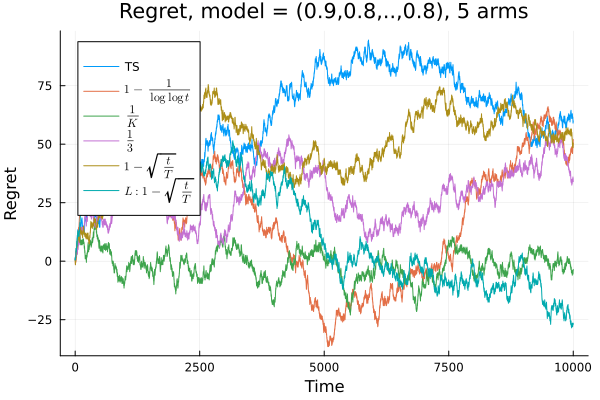

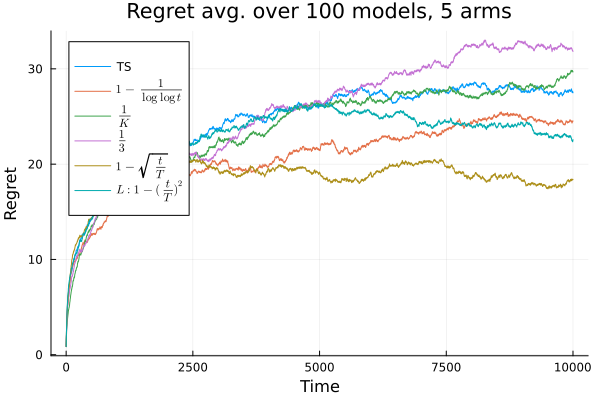

"/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-Dec24/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/regret_model_100_arms_5_seed_1_hori_10000_tT2.pdf"

In [26]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting model[1] = (0.9,0.8...,0.8)

regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[1],dims=1)[:]/tot_seed_vals
regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[1],dims=1)[:]/tot_seed_vals

list_of_all_alg_regrets = [regret_TS regret_eTS regret_e_const_TS regret_e_third_TS regret_eTS_finiteDecay regret_TS_decay_greedy_knownT]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret, model = (0.9,0.8,..,0.8), "*string(num_arms)*" arms")
display(pic)
# pl.savefig("../julia_code/Bernoulli/regret_model_1_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")


regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-(\frac{t}{T})^2"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_tT2.pdf")
#     #@show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_TS_model_list[1]
#     # # regret_every_step_arms_ts = regret_TS_model_list[1][1:hz]
#     # # regret_every_step_arms_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT_model_list[model_chosen]
    
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # fig, ax = pl.subplots()
#     # pl.plot(horizon,horizon)
    
#     pic = pl.plot(horizon,[regret_TS/num_models regret_TS_decay_greedy_knownT],label=["TS" "t/T"]) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
#     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
#     pl.xlabel!("Time")
#     pl.ylabel!("Regret")
#     pl.title!("Regret")
#     display(pic)
# end


In [115]:
hor_names = [string(i) for i in 1:hz]
for alg_name in ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg","TS_decay_greedy_knownT"]
    mkdir("../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name)
    if alg_name ==  "thom_samp_alg"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_TS_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end
            
    elseif alg_name ==  "eTS_alg"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_eTS_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end
    elseif alg_name == "e_const_TS_alg"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_e_const_TS_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end
    elseif alg_name == "e_third_TS_alg"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_e_third_TS_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end
    elseif alg_name == "eTS_finiteDecay_alg"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_eTS_finiteDecay_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end    
    elseif alg_name == "TS_decay_greedy_knownT"
        for model in model_chosen_to_run
            regret_df = df.DataFrame(seed=round.(regret_seed_TS_decay_greedy_knownT_model_list[model][1,:],sigdigits=4))
            csv_file_name  = "../julia_code/Bernoulli/horizon_10k_arms_5_seed_1_models_1000/"*alg_name*"/regret_"*alg_name*"_model_"*string(model)*".csv"
            csv.write(csv_file_name, regret_df)
        end
    end
        
    
end


In [ ]:

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface,Ipopt
using ForwardDiff, ModelingToolkit
using Distributed

import Plots as pl
import LinearAlgebra as la

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
##########################################################################

# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 40
seed_values = 1:tot_seed_vals 

num_models = 10 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))


model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
        model[2,:] = [0.3 0.2 0.15 0.25 0.2  0.15 0.15 0.1 0.1 0.1]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0

model_chosen_to_run = [2] #1:num_models #
# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

for generic in ["TS_decay_greedy_knownT","thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    for model_chosen in model_chosen_to_run 

        @time begin
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz]) # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_model_list,regret_seed)
            
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_model_list,regret_seed)
            
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_const_TS_model_list,regret_seed)
            
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_third_TS_model_list,regret_seed)
            
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_finiteDecay_model_list,regret_seed)

            elseif generic == "TS_decay_greedy_knownT"
                for count in 1:tot_seed_vals #(count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = count
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_model_list,regret_seed)
            
            end
        end
    end
end


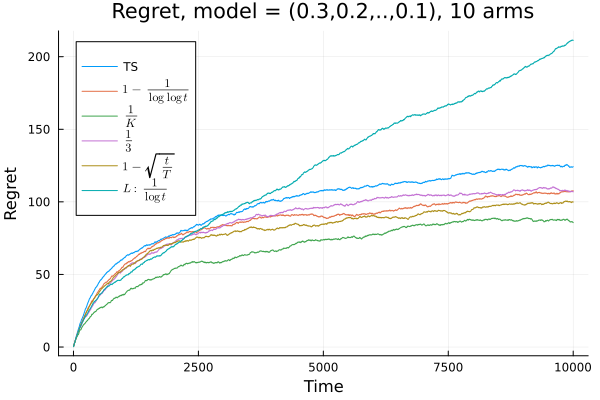

In [6]:
#plotting for 10 arms

import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting model[1] = (0.9,0.8...,0.8)

regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[1],dims=1)[:]/tot_seed_vals
regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[1],dims=1)[:]/tot_seed_vals

list_of_all_alg_regrets = [regret_TS regret_eTS regret_e_const_TS regret_e_third_TS regret_eTS_finiteDecay regret_TS_decay_greedy_knownT]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:\frac{1}{ \log t}"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret, model = (0.3,0.2,..,0.1), "*string(num_arms)*" arms")
display(pic)
# pl.savefig("../julia_code/Bernoulli/regret_model_1_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")


# regret_TS = 0
# regret_eTS = 0
# regret_e_const_TS = 0
# regret_e_third_TS = 0
# regret_eTS_finiteDecay = 0
# regret_TS_decay_greedy_knownT = 0

# #### plotting averaged over models
# for model in model_chosen_to_run
 
#     regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
#     regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
#     regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
#     regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
#     regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
#     regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
# end

# num_models = length(model_chosen_to_run)
# # list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models  regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
# # list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}"  L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
# list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
# list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-(\frac{t}{T})^3"]
# pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
#     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
# pl.xlabel!("Time")
# pl.ylabel!("Regret")
# pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
# display(pic)
# # pl.savefig("regret_model_1_arms_10_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_tT_pow2.pdf")
# #     #@show regret_seed_TS_decay_greedy_knownT_model_list[1]
# #     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
# #     # # @show regret_TS_model_list[1]
# #     # # regret_every_step_arms_ts = regret_TS_model_list[1][1:hz]
# #     # # regret_every_step_arms_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT_model_list[model_chosen]
    
# #     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
# #     # # fig, ax = pl.subplots()
# #     # pl.plot(horizon,horizon)
    
# #     pic = pl.plot(horizon,[regret_TS/num_models regret_TS_decay_greedy_knownT],label=["TS" "t/T"]) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
# #     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
# #     pl.xlabel!("Time")
# #     pl.ylabel!("Regret")
# #     pl.title!("Regret")
# #     display(pic)
# end


In [ ]:
### 5 algorithms, Policy with K=50 arms, T=50000

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface,Ipopt
using ForwardDiff, ModelingToolkit
using Distributed

import Plots as pl
import LinearAlgebra as la

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
##########################################################################

# set_printoptions(precision=2,suppress=True)

hz = 50000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

num_models = 1000 #int(input("Enter the #models : "))#4
num_arms = 50 #int(input("Enter the #arms : "))


model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0

model_chosen_to_run = 1:num_models #
# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []


hor_names = [string(i) for i in 1:hz]

for generic in ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg"]# ,"TS_decay_greedy_knownT"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = []
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz]) # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(regret_seed_generic_model_list[model_chosen],sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                  
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(regret_seed_generic_model_list[model_chosen],sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(regret_seed,sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(regret_seed_generic_model_list[model_chosen],sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(regret_seed_generic_model_list[model_chosen],sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for count in 1:tot_seed_vals #(count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)
            
                regret_df = df.DataFrame(round.(regret_seed_generic_model_list[model_chosen],sigdigits=4),hor_names)
                csv_file_name  = "../julia_code/Bernoulli/horizon_50k_arms_50_seed_1_models_1000/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
               
            
            end
        end
        
    end
end


In [ ]:
### 5 algorithms, Policy with K=100 arms, T=50000

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface, Ipopt
using ForwardDiff, ModelingToolkit
using Distributed
using Printf

import Plots as pl
import LinearAlgebra as la
import DataFrames as df
import CSV as csv

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_tT2_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
################################################################################

################################################################################
# set_printoptions(precision=2,suppress=True)


hz = 10000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

num_models = 1000 #int(input("Enter the #models : "))#4
num_arms = 15 #int(input("Enter the #arms : "))

alg_names_to_run = ["TS_decay_greedy_knownT","thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ] #,"eTS_finiteDecay_tT2_alg"]

model_chosen_to_run = [30,32,38,39]

#horizon_10k_arms_5_seed_1_models_1000
folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*alg_name)
end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0


# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []


hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = []
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                  
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)
            
                regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*".csv"
                csv.write(csv_file_name, regret_df)
               
            
            end
        end
        
    end
end


In [ ]:
#plotting for 10 arms

import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting model[1] = (0.9,0.8...,0.8)

regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[1],dims=1)[:]/tot_seed_vals
regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[1],dims=1)[:]/tot_seed_vals
regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[1],dims=1)[:]/tot_seed_vals

list_of_all_alg_regrets = [regret_TS regret_eTS regret_e_const_TS regret_e_third_TS regret_eTS_finiteDecay regret_TS_decay_greedy_knownT]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret, model = (0.9,0.8,..,0.8), "*string(num_arms)*" arms")
display(pic)
# pl.savefig("../julia_code/Bernoulli/regret_model_1_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")


regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
# list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models  regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
# list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}"  L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
pl.savefig("regret_model_100_arms_10_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_tT_pow2.pdf")
#     #@show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # @show regret_TS_model_list[1]
#     # # regret_every_step_arms_ts = regret_TS_model_list[1][1:hz]
#     # # regret_every_step_arms_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT_model_list[model_chosen]
    
#     # # @show regret_seed_TS_decay_greedy_knownT_model_list[1]
#     # # fig, ax = pl.subplots()
#     # pl.plot(horizon,horizon)
    
#     pic = pl.plot(horizon,[regret_TS/num_models regret_TS_decay_greedy_knownT],label=["TS" "t/T"]) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
#     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
#     pl.xlabel!("Time")
#     pl.ylabel!("Regret")
#     pl.title!("Regret")
#     display(pic)
# end


In [ ]:
##### Policy with K=5 arms, T=10000, 6 algorithms, 1000 models, linear rate

using Random, Distributions
using Integrals
using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface,Ipopt
using ForwardDiff, ModelingToolkit
using Distributed

import Plots as pl
import LinearAlgebra as la

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
##########################################################################

# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
horizon = 1:hz

tot_seed_vals = 1
seed_values = 1:tot_seed_vals 

num_models = 1000 #int(input("Enter the #models : "))#4
num_arms = 5 #int(input("Enter the #arms : "))


model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0

model_chosen_to_run = 1:num_models #
# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

for generic in ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg","TS_decay_greedy_knownT"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    rewards_every_step_generic_model = zeros((num_models,hz))
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz]) # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_model_list,regret_seed)
            
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_model_list,regret_seed)
            
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_const_TS_model_list,regret_seed)
            
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_e_third_TS_model_list,regret_seed)
            
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                    
                #     time_taken[count] = time.process_time() 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_eTS_finiteDecay_model_list,regret_seed)

            elseif generic == "TS_decay_greedy_knownT"
                for count in 1:tot_seed_vals #(count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    println("Seed = ", seed, ", Regret = ", regret_seed[count,hz])
                 
                end
                
                println(generic*" Regret avg. over seeds = ", sum(regret_seed[:,hz])/tot_seed_vals)
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_model_list,regret_seed)
            
            end
        end
    end
end


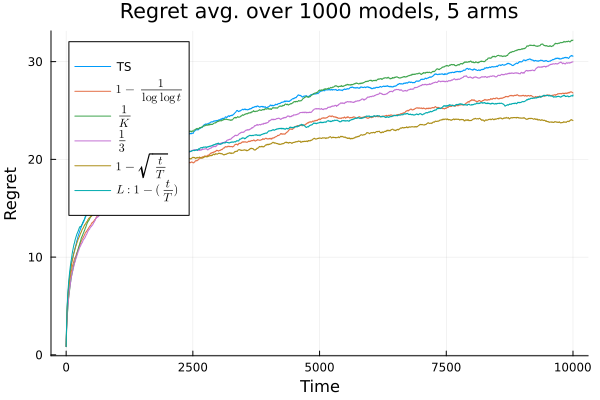

"/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-Dec24/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/regret_model_1000_arms_5_seed_1_hori_10000_tT_linear_rate.pdf"

In [18]:
import Plots as pl
using LaTeXStrings

# regret_TS = 0
# regret_eTS = 0
# regret_e_const_TS = 0
# regret_e_third_TS = 0
# regret_eTS_finiteDecay = 0
# regret_TS_decay_greedy_knownT = 0

# #### plotting model[1] = (0.9,0.8...,0.8)

# regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[1],dims=1)[:]/tot_seed_vals
# regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[1],dims=1)[:]/tot_seed_vals
# regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[1],dims=1)[:]/tot_seed_vals
# regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[1],dims=1)[:]/tot_seed_vals
# regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[1],dims=1)[:]/tot_seed_vals
# regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[1],dims=1)[:]/tot_seed_vals

# list_of_all_alg_regrets = [regret_TS regret_eTS regret_e_const_TS regret_e_third_TS regret_eTS_finiteDecay regret_TS_decay_greedy_knownT]
# list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-\sqrt{\frac{t}{T}}"]
# pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
#     # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
# pl.xlabel!("Time")
# pl.ylabel!("Regret")
# pl.title!("Regret, model = (0.9,0.8,..,0.8), "*string(num_arms)*" arms")
# display(pic)
# # pl.savefig("../julia_code/Bernoulli/regret_model_1_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*".pdf")


regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-(\frac{t}{T})"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_tT_linear_rate.pdf")


In [17]:
import DataFrames as df
import CSV as csv

# list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
alg_list = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg","TS_decay_greedy_knownT"] #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"
hor_names = [string(i) for i in 1:hz]

folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"t_T_rate"
mkpath(folder_name)

# for alg_name in alg_names_to_run
#     mkpath(folder_name*"/"*alg_name)
# end
count = 1
for alg_name in alg_list
    path_for_csv = mkpath(folder_name*"/"*alg_name)
    # println(path_for_csv)
    regret = round.(list_of_all_alg_regrets[:,count],sigdigits=4)
    
    # println(regret)
    regret_df = df.DataFrame(r = regret)
    
    csv_file_name = path_for_csv*"/regret_"*alg_name*"_models_"*string(1000)*"t_T_rate"*".csv"
    csv.write(csv_file_name, regret_df)
    count = count + 1
end

In [3]:
using Random, Distributions
using Integrals
# using Optimization, OptimizationMOI, OptimizationOptimJL, DifferentiationInterface, Ipopt
# using ForwardDiff, ModelingToolkit
using Distributed
using Printf

import Plots as pl
import LinearAlgebra as la
import DataFrames as df
import CSV as csv
################################################################################


In [ ]:
### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 


include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_tT2_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 20000 #int(input("Enter the horizon : "))
num_models = 2
horizon = 1:hz

# tot_seed_vals = 500
# seed_values = 1:tot_seed_vals 
tot_seed_vals = 499
seed_values = 501:999 

 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))

alg_names_to_run = ["TS_decay_greedy_knownT","thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]##,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
model_chosen_to_run = [1] #[i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = 71:100 #1000 #[30,32,38,39]

#horizon_10k_arms_5_seed_1_models_1000
folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*alg_name)
end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0


# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = Float64[]
regret_TS_new_model_list = Float64[]
regret_TS_copies_model_list = Float64[]
regret_randomized_TS_finite_hori_model_list = Float64[]
regret_randomized_ucb_range_model_list = Float64[]
regret_randomized_ucb_model_list = Float64[]
regret_ucb_model_list = Float64[]
regret_TS_finite_hori_model_list = Float64[]
regret_seed_TS_finite_hori_model_list = Float64[]

regret_seed_TS_model_list = Float64[]
regret_seed_TS_new_model_list = Float64[]
regret_seed_TS_copies_model_list = Float64[]
regret_seed_2norm_model_list = Float64[]
regret_seed_TS_Greedy_model_list = Float64[]
regret_seed_TS_ucb_model_list = Float64[]
regret_seed_TS_decay_Greedy_model_list = Float64[]
regret_seed_TS_decay_greedy_knownT_model_list = Float64[]
regret_seed_TS_greedy_decay_knownT_model_list = Float64[]
regret_seed_randomized_ucb_model_list = Float64[]

regret_eTS_model_list = Float64[]
regret_seed_eTS_model_list = Float64[]
regret_e_const_TS_model_list = Float64[]
regret_seed_e_const_TS_model_list = Float64[]

regret_eTS_finiteDecay_model_list = Float64[]
regret_seed_eTS_finiteDecay_model_list = Float64[]

regret_e_third_TS_model_list = Float64[]
regret_seed_e_third_TS_model_list = Float64[]


hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = Float64[]
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            times_sampled_avg = zeros(num_arms)
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic

                    times_sampled_avg += times_sampled
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            
            end
            # reg_temp = sum(regret_seed,dims=1)/tot_seed_vals
            # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
            # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, regret_df)
            # regret_generic_model[model_chosen,:] = reg_temp[1,:]

            # times_sampled_df = df.DataFrame(x=times_sampled_avg/tot_seed_vals)
            # csv_file_name  = folder_name*"/"*generic*"/times_sampled_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, times_sampled_df)
        end
        # regret_avg_model_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_avg_over_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        # csv.write(csv_file_name, regret_avg_model_df)
        
    end
end


In [ ]:
import Plots as pl
using LaTeXStrings

regret_TS = 0
regret_eTS = 0
regret_e_const_TS = 0
regret_e_third_TS = 0
regret_eTS_finiteDecay = 0
regret_TS_decay_greedy_knownT = 0

#### plotting averaged over models
for model in model_chosen_to_run
 
    regret_TS = regret_TS .+ sum(regret_seed_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS = regret_eTS .+ sum(regret_seed_eTS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_const_TS = regret_e_const_TS .+ sum(regret_seed_e_const_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_e_third_TS = regret_e_third_TS .+ sum(regret_seed_e_third_TS_model_list[model],dims=1)[:]/tot_seed_vals
    regret_eTS_finiteDecay = regret_eTS_finiteDecay .+ sum(regret_seed_eTS_finiteDecay_model_list[model],dims=1)[:]/tot_seed_vals
    regret_TS_decay_greedy_knownT = regret_TS_decay_greedy_knownT .+ sum(regret_seed_TS_decay_greedy_knownT_model_list[model],dims=1)[:]/tot_seed_vals
end

num_models = length(model_chosen_to_run)
list_of_all_alg_regrets = [regret_TS/num_models regret_eTS/num_models regret_e_const_TS/num_models regret_e_third_TS/num_models regret_eTS_finiteDecay/num_models regret_TS_decay_greedy_knownT/num_models]
list_of_all_labels = ["TS" L"1-\frac{1}{\log\log t}" L"\frac{1}{K}" L"\frac{1}{3}" L"1-\sqrt{\frac{t}{T}}" L"L:1-(\frac{t}{T})"]
pic = pl.plot(horizon,list_of_all_alg_regrets,label=list_of_all_labels) #,color=algo_plot_pars['TS'][0],label=algo_plot_pars['TS'][1])
    # pl.plot(horizon,[regret_TS,label="t/T")# ,color=algo_plot_pars['2_norm_decay_greedy_knownT'][0],label=algo_plot_pars['2_norm_decay_greedy_knownT'][1])
pl.xlabel!("Time")
pl.ylabel!("Regret")
pl.title!("Regret avg. over "*string(num_models)*" models, "*string(num_arms)*" arms")
display(pic)
pl.savefig("regret_model_"*string(num_models)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_hori_"*string(hz)*"_t_T_2_rate.pdf")


In [2]:
using Random, Distributions
using Integrals
using Distributed
using Printf

import Plots as pl
import LinearAlgebra as la
import DataFrames as df
import CSV as csv

In [1]:
### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 


include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_tT2_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/MOTS_alg_file.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 2
horizon = 1:hz

tot_seed_vals = 500
seed_values = 1:500 #501:1000

 #int(input("Enter the #models : "))#4
num_arms = 40 #int(input("Enter the #arms : "))

# alg_names_to_run = ["MOTS"]
alg_names_to_run = ["TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
model_chosen_to_run = [1] #[i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = [1] #71:100 #1000 #[30,32,38,39]

#horizon_10k_arms_5_seed_1_models_1000
# folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
# mkpath(folder_name)

# for alg_name in alg_names_to_run
#     mkpath(folder_name*"/"*alg_name)
# end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0


# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

# regret_TS_model_list = Float64[]
# regret_TS_new_model_list = Float64[]
# regret_TS_copies_model_list = Float64[]
# regret_randomized_TS_finite_hori_model_list = Float64[]
# regret_randomized_ucb_range_model_list = Float64[]
# regret_randomized_ucb_model_list = Float64[]
# regret_ucb_model_list = Float64[]
# regret_TS_finite_hori_model_list = Float64[]
# regret_seed_TS_finite_hori_model_list = Float64[]

# regret_seed_TS_model_list = Float64[]
# regret_seed_TS_new_model_list = Float64[]
# regret_seed_TS_copies_model_list = Float64[]
# regret_seed_2norm_model_list = Float64[]
# regret_seed_TS_Greedy_model_list = Float64[]
# regret_seed_TS_ucb_model_list = Float64[]
# regret_seed_TS_decay_Greedy_model_list = Float64[]
# regret_seed_TS_decay_greedy_knownT_model_list = Float64[]
# regret_seed_TS_greedy_decay_knownT_model_list = Float64[]
# regret_seed_randomized_ucb_model_list = Float64[]

# regret_eTS_model_list = Float64[]
# regret_seed_eTS_model_list = Float64[]
# regret_e_const_TS_model_list = Float64[]
# regret_seed_e_const_TS_model_list = Float64[]

# regret_eTS_finiteDecay_model_list = Float64[]
# regret_seed_eTS_finiteDecay_model_list = Float64[]

# regret_e_third_TS_model_list = Float64[]
# regret_seed_e_third_TS_model_list = Float64[]



hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    # rewards_every_step_generic = zeros((num_models,hz))
    # rewards_every_step_arms_generic = zeros((num_models,hz))
    # regret_generic_model = zeros((num_models,hz))
    # regret_seed_generic_model_list = Float64[]
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            times_sampled = zeros(num_arms)
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    data_generic[count,:] = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:],times_sampled) = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    # rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] .= p_max*LinRange(1,hz,hz) .- data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])./tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            elseif generic == "MOTS"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]

                    # println("MOTS")
                    data_generic[count,:] = MOTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_MOTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_MOTS_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            end
            # reg_temp = sum(regret_seed,dims=1)/tot_seed_vals
            # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
            # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, regret_df)
            # regret_generic_model[model_chosen,:] = reg_temp[1,:]
        end
        # regret_avg_model_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_avg_over_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        # csv.write(csv_file_name, regret_avg_model_df)
        
    end
end


LoadError: UndefVarError: `Random` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: Random is loaded but not imported in the active module Main.

In [119]:
#### Monte Carlo computation for integrals

### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 


include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_tT2_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_MC_sim_alg_file.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 2
horizon = 1:hz

tot_seed_vals = 5
seed_values = 1:tot_seed_vals #501:1000

 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))
# TS_decay_greedy_knownT_MC_sim_alg_file.jl
# alg_names_to_run = ["MOTS"]

# alg_names_to_run = ["TS_decay_greedy_knownT"]
alg_names_to_run = ["TS_decay_greedy_knownT_MC_sim","thom_samp_alg","eTS_finiteDecay_alg"]
# alg_names_to_run = ["TS_decay_greedy_knownT"] #,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
model_chosen_to_run = [1] #[i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = [1] #71:100 #1000 #[30,32,38,39]

# #horizon_10k_arms_5_seed_1_models_1000
# folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
# mkpath(folder_name)

# for alg_name in alg_names_to_run
#     mkpath(folder_name*"/"*alg_name)
# end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
# 
    elseif num_arms == 100
        model[1,:] = [0.75 0.65 0.65 0.65 0.65  0.65 0.65 0.65 0.65 0.65 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5]
    elseif num_arms == 500
        model[1,:] = ones(num_arms)
        model[1,1] = 0.75
        model[1,2:num_arms] = 0.25
    end

end
    # elseif num_arms == 500:
    #     model[0] = linspace(0.9,0.1,num_arms)
    
    # opt_arms[m] = argmax(model[m])
    #print(m,model[m])

# max_means = reshape(max(model,1),(num_models,1))*ones((num_models,num_arms))
# optimal_model_arms = (model >= max_means ) + 0


# model_chosen_to_run = 1:num_models #)##,2,6,7]#1,2,3,4]#,1,2,3,4]#[i for i in range(num_models)]
# model_chosen_to_run = [0,7,8,9,10,11,12,13]

regret_TS_model_list = []
regret_TS_new_model_list = []
regret_TS_copies_model_list = []
regret_randomized_TS_finite_hori_model_list = []
regret_randomized_ucb_range_model_list = []
regret_randomized_ucb_model_list = []
regret_ucb_model_list = []
regret_TS_finite_hori_model_list = []
regret_seed_TS_finite_hori_model_list = []

regret_seed_TS_model_list = []
regret_seed_TS_new_model_list = []
regret_seed_TS_copies_model_list = []
regret_seed_2norm_model_list = []
regret_seed_TS_Greedy_model_list = []
regret_seed_TS_ucb_model_list = []
regret_seed_TS_decay_Greedy_model_list = []
regret_seed_TS_decay_greedy_knownT_model_list = []
regret_seed_TS_greedy_decay_knownT_model_list = []
regret_seed_randomized_ucb_model_list = []

regret_eTS_model_list = []
regret_seed_eTS_model_list = []
regret_e_const_TS_model_list = []
regret_seed_e_const_TS_model_list = []

regret_eTS_finiteDecay_model_list = []
regret_seed_eTS_finiteDecay_model_list = []

regret_e_third_TS_model_list = []
regret_seed_e_third_TS_model_list = []

regret_MOTS_model_list = []
regret_seed_MOTS_model_list = []

regret_seed_TS_decay_greedy_knownT_MC_sim_model_list = []

hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = []
    # avg_arms_sampled_generic = zeros((num_models,hz,num_arms))
    # avg_opt_arms_sampled_generic = zeros(hz)

    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            # @show arms
            # max_arm_ind = where(optimal_model_arms[model_chosen] == 1)[0][0]
            # print(arms,max_arm_ind)
            p_max = maximum(arms)
            # best_rew = hz*p_max
        # 
            # data_generic = zeros((tot_seed_vals,hz,num_arms))
            data_generic = zeros((tot_seed_vals,hz))
            # arms_sampled_generic = zeros((tot_seed_vals,hz,num_arms))
            # regret_alg_generic = zeros(tot_seed_vals)
            regret_every_step_generic = zeros((1,hz))
            # regret_seed_time_generic = zeros((tot_seed_vals,hz))
    
            # regret_seed_generic = zeros((tot_seed_vals))
            
            regret_seed = zeros((tot_seed_vals,hz))
            
            if generic == "thom_samp_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_const_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_const_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "e_third_TS_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_e_third_TS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "eTS_finiteDecay_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                     
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_eTS_finiteDecay_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_generic_model_list,regret_seed)

                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
                
            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_TS_decay_greedy_knownT_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                # push!(regret_seed_generic_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            elseif generic == "TS_decay_greedy_knownT_MC_sim"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]

                    # println("MOTS")
                    (data_generic[count,:], times_sampled) = value_policy_alg_TS_decay_greedy_knownT_MC_sim(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
                # push!(regret_MOTS_model_list, rewards_every_step_generic[model_chosen]/tot_seed_vals ) 
                
                push!(regret_seed_TS_decay_greedy_knownT_MC_sim_model_list,regret_seed)
            
                # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
                # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
                # csv.write(csv_file_name, regret_df)
               
            end
            # reg_temp = sum(regret_seed,dims=1)/tot_seed_vals
            # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
            # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, regret_df)
            # regret_generic_model[model_chosen,:] = reg_temp[1,:]
        end
        # regret_avg_model_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_avg_over_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        # csv.write(csv_file_name, regret_avg_model_df)
        
    end
end


Seed = 1, Regret = 438.00 
Seed = 2, Regret = 439.00 
Seed = 3, Regret = 478.00 
Seed = 4, Regret = 467.00 
Seed = 5, Regret = 505.00 
1 TS_decay_greedy_knownT_MC_sim Regret avg. over seeds = 465.40 
121.597118 seconds (9.45 M allocations: 88.893 GiB, 3.94% gc time, 0.21% compilation time)
1 thom_samp_alg Regret avg. over seeds = 85.80 
  0.172445 seconds (950.01 k allocations: 72.489 MiB, 5.46% gc time, 74.19% compilation time)
1 eTS_finiteDecay_alg Regret avg. over seeds = 58.40 
  0.203313 seconds (1.48 M allocations: 105.632 MiB, 3.55% gc time, 82.31% compilation time)


In [106]:
## checking prijection using two methods

 # [0.20730361736093011; 0.09289924694106189; 0.06653019091447865; 0.04527190973630618; 0.0; 0.09942099321218073; 0.12971797272549102; 0.18459441002615185; 0.0; 0.17426165908339952]
prob_opt_curr = [0.0012669777267059665; 0.009953617075484296; 0.013303920951952783; 0.024736935667137198; 0.008497768592846336; 0.002606328725179024; 0.0007855438520333795; 0.012212949424287821; 0.008497768592846337; 0.0006185294273576392]
means_of_arms_dist = [0.9053103007037748, 0.6363636363636364, 0.5714285714285714, 0.5, 0.3333333333333333, 0.6666666666666666, 0.7368421052631579, 0.8317757009345794, 0.3333333333333333, 0.8345323741007195]
# a = prob_opt_curr + means_of_arms_dist
# (best_policy, prob_opt_curr, means_of_arms_dist) = ([0.9635968285135496; 0.0; 0.0; 0.0; 0.0; 0.0; 0.0; 0.023367961214601413; 0.0; 0.013035210271849082;;], 
#     [0.0012669777267059665; 0.009953617075484296; 0.013303920951952783; 0.024736935667137198; 0.008497768592846336; 0.002606328725179024; 0.0007855438520333795; 0.012212949424287821; 0.008497768592846337; 0.0006185294273576392;;
#         [0.9053103007037748, 0.6363636363636364, 0.5714285714285714, 0.5, 0.3333333333333333, 0.6666666666666666, 0.7368421052631579, 0.8317757009345794, 0.3333333333333333, 0.8345323741007195])

10-element Vector{Float64}:
 0.9065772784304807
 0.6463172534391206
 0.5847324923805242
 0.5247369356671372
 0.34183110192617966
 0.6692729953918457
 0.7376276491151912
 0.8439886503588673
 0.34183110192617966
 0.8351509035280771

In [130]:
function check_proj(params)
    num_arms = params[1]
    hori = params[2]
    bp_old = zeros(num_arms)
    rand_vec = rand(num_arms,1)
    # prob_opt_curr = rand_vec ./ sum(rand_vec)
    # means_of_arms_dist = rand(num_arms)
    prob_opt_curr = [0.0012669777267059665; 0.009953617075484296; 0.013303920951952783; 0.024736935667137198; 0.008497768592846336; 0.002606328725179024; 0.0007855438520333795; 0.012212949424287821; 0.008497768592846337; 0.0006185294273576392]
    means_of_arms_dist = [0.9053103007037748, 0.6363636363636364, 0.5714285714285714, 0.5, 0.3333333333333333, 0.6666666666666666, 0.7368421052631579, 0.8317757009345794, 0.3333333333333333, 0.8345323741007195]

    for curr_time in 1866:1866
        Random.seed!(curr_time)
        
        # decay_coeff = (curr_time/hori)^(2) 
        decay_coeff = 1 - 1/(curr_time+1)^(0.05)
        best_policy = ones(num_arms,1)/num_arms
        
    
        if decay_coeff < 1 && decay_coeff > 0
            lifted_vector = prob_opt_curr .+ (decay_coeff/(1-decay_coeff)).* means_of_arms_dist 
            sorted_indices = sortperm(-lifted_vector)#,dims=1)
            @show lifted_vector, sorted_indices#, (decay_coeff/(1-decay_coeff))#, decay_coeff/(1-decay_coeff) #prob_opt_curr, means_of_arms_dist
            theta_term = 0 
            i = 1 
            while i <= num_arms
                theta_term = (1/i)*(sum(lifted_vector[sorted_indices[1:i]]) - 1)
    
                if  lifted_vector[sorted_indices[i]] - theta_term < 0
                    @show theta_term,"old"
                    theta_term = (1/(i-1))*(sum(lifted_vector[sorted_indices[1:i-1]]) - 1)
                    
                    break
                end 
                i += 1
            end

            @show theta_term, sorted_indices[1:i-1], lifted_vector  .- theta_term
            best_policy = max.(lifted_vector  .- theta_term ,0)
          
        else 
            best_policy = zeros(num_arms)
            best_policy[argmax(means_of_arms_dist)] = 1      
        end
        
        max_prob_ind = argmax(best_policy[1:num_arms])[1]
        best_policy[max_prob_ind] = best_policy[max_prob_ind] - (sum(best_policy) - 1)
        # println(best_policy[1:num_arms],sum(best_policy))
        arm_chosen = rand(Categorical(best_policy[1:num_arms]))
        bp_old .= best_policy
        @show bp_old
        ###################################################################
        ###################################################################
        # ## optimal using Lagrange multipliers
       
        # decay_coeff = (curr_time/hori)^(2) 
        best_policy = prob_opt_curr
        if decay_coeff != 1
            old_lambda =  (decay_coeff/(1-decay_coeff)).*(means_of_arms_dist .- sum(means_of_arms_dist)/num_arms) 
            best_policy = prob_opt_curr .+ old_lambda
            # @show best_policy, decay_coeff/(1-decay_coeff)
            neg_ind_list = Int32[]
            remaining_ind = Int32[]
            # neg_ind_list = []
            while any(<(0),best_policy)
                min_ind_neg = argmin(best_policy)[1]
                neg_ind_list = push!(neg_ind_list,min_ind_neg) 
                remaining_ind = [i for i in 1:num_arms if !(i in neg_ind_list)]
                # println(remaining_ind,neg_ind_list)
                new_lambda =  (decay_coeff/(1-decay_coeff)).*(means_of_arms_dist .- sum(means_of_arms_dist[remaining_ind])/length(remaining_ind))  .+ sum(prob_opt_curr[neg_ind_list])/length(remaining_ind)
                best_policy = prob_opt_curr .+ new_lambda 
                best_policy[neg_ind_list] .= 0
               
            end
            @show remaining_ind
        else
            best_policy = zeros(num_arms)
            best_policy[argmax(means_of_arms_dist)] = 1      
        end
        max_prob_ind = argmax(best_policy[1:num_arms])[1]
        best_policy[max_prob_ind] = best_policy[max_prob_ind] - (sum(best_policy) - 1)
        arm_chosen = rand(Categorical(best_policy[1:num_arms]))

        @show best_policy
        
        # # println(sum((bp_old-best_policy).^2))
        # if sum((bp_old-best_policy).^2) > 10e-7
        #     println(sum((bp_old-best_policy).^2))
        # end
        # arm_old = rand(Categorical(bp_old[1:num_arms]))
        # # if (arm_old-arm_chosen).^2 > 0
        # #     println(curr_time," old ",arm_old, " new ",arm_chosen)
        # #     @show bp_old,best_policy
        # # end

        ###################################################################################
    #     decay_coeff = 1 - 1/(curr_time+1)^(0.05)
    #     # decay_coeff = 1-1/(1*log(log(curr_time+16)))
     
    #     best_policy = prob_opt_curr
    #     # @show curr_time,decay_coeff
    #     if decay_coeff < 1 && decay_coeff != 0
    #         lifted_vector = prob_opt_curr .+ (decay_coeff/(1-decay_coeff)).*means_of_arms_dist 
    #         # @show lifted_vector
    #         sorted_indices = sortperm(-lifted_vector,dims=1)
    #         # @show lifted_vector #, sorted_indices
    #         theta_term = 0 
    #         i = 1 
    #         while i <= num_arms
    #             theta_term = (1/i)*(sum(lifted_vector[sorted_indices[1:i]]) - 1)
    #             # @show  lifted_vector[sorted_indices[i]], theta_term
    #             if  lifted_vector[sorted_indices[i]] - theta_term <= 0
    #                 # @show  i,lifted_vector, theta_term
    #                 # fix the theta_term with the last index
    #                 # @show prob_opt_curr, means_of_arms_dist#sorted_indices,i,sorted_indices[1:i-1]
    #                 theta_term = (1/(i-1))*(sum(lifted_vector[sorted_indices[1:i-1]]) - 1)
    #                 # @show i
    #                 break
    #             end 
    #             i += 1
    #         end

    #         # best_policy[sorted_indices[1:i-1]] .= lifted_vector[sorted_indices[1:i-1]] .- theta_term 
    #         # best_policy[sorted_indices[i:end]] .= 0
            
    #         best_policy .= max.(lifted_vector .- theta_term,0)
    #         # @show  best_policy,lifted_vector, theta_term
    #         # @show sorted_indices,best_policy, sum(best_policy) #, length(best_policy)

    #     else 
    #         best_policy = zeros(num_arms)
    #         best_policy[argmax(means_of_arms_dist)] = 1      
    #     end
        
    #     max_prob_ind = argmax(best_policy[1:num_arms])[1]
    #     best_policy[max_prob_ind] = best_policy[max_prob_ind] - (sum(best_policy) - 1)
    #     # println(best_policy[1:num_arms],sum(best_policy))
    #     arm_chosen = rand(Categorical(best_policy[1:num_arms]))
    #     # bp_old = best_policy
    #     @show best_policy
    #     ###################################################################
    #     ## optimal using Lagrange multipliers
    #     # decay_coeff = (curr_time/hori)^2 
    #     decay_coeff = 1- 1/(curr_time+1)^(0.05)#log(log(curr_time+16)) 
    #     if decay_coeff != 1
    #         old_lambda =  (decay_coeff/(1-decay_coeff)).*(means_of_arms_dist .- sum(means_of_arms_dist)/num_arms) 
    #         best_policy .= prob_opt_curr .+ old_lambda
    #         # @show best_policy
    #         # println(sum(best_policy))
    #         neg_ind_list = Int32[]
    #         remaining_ind =Int32[]
    #         while any(<(0),best_policy)
    #             min_ind_neg = argmin(best_policy)[1]
    #             neg_ind_list = push!(neg_ind_list,min_ind_neg) 
    #             remaining_ind = [i for i in 1:num_arms if !(i in neg_ind_list)]
    #             # println(remaining_ind,neg_ind_list)
    #             # new_lambda =  (decay_coeff/(1-decay_coeff)).*(means_of_arms_dist .- sum(means_of_arms_dist[remaining_ind])/length(remaining_ind))  .+ sum(prob_opt_curr[neg_ind_list])/length(remaining_ind)
    #             best_policy .= prob_opt_curr .+ (decay_coeff/(1-decay_coeff)).*(means_of_arms_dist .- sum(means_of_arms_dist[remaining_ind])/length(remaining_ind))  .+ sum(prob_opt_curr[neg_ind_list])/length(remaining_ind) 
    #             best_policy[neg_ind_list] .= 0
                
    #         end
    #     else
    #         best_policy = zeros(num_arms)
    #         best_policy[argmax(means_of_arms_dist)] = 1        
    #     end
    #     # # println(round.(best_policy,sigdigits=3))

    #     # println(best_policy)
    #     # println(sum((bp_old .- best_policy).^2))
    #     # max_prob_ind = argmax(best_policy[1:num_arms])[1]
    #     # best_policy[max_prob_ind] = best_policy[max_prob_ind] - (sum(best_policy) - 1)
    #     # # println(best_policy[1:num_arms],sum(best_policy))
    #     # arm_chosen = rand(Categorical(best_policy[1:num_arms]))
    #     # if sum(best_policy) == 1
    #     #     # println(best_policy)
    #     #     arm_chosen = rand(Categorical(optim_policy))
    #     # end
    #     @show best_policy
      
    end
end

@time begin 


num_arms = 10
hori = 500
check_proj((num_arms,hori))
end

(lifted_vector, sorted_indices) = ([0.41529044352075717, 0.3009803269535899, 0.27463402778127205, 0.25340077914279163, 0.16094033090994928, 0.3074914533593849, 0.3377638395003662, 0.3926070067950026, 0.16094033090994928, 0.382273289760824], [1, 8, 10, 7, 6, 2, 3, 4, 5, 9])
(theta_term, "old") = (0.20282016641377085, "old")
(theta_term, sorted_indices[1:i - 1], lifted_vector .- theta_term) = (0.20805514585174856, [1, 8, 10, 7, 6, 2, 3, 4], [0.2072352976690086, 0.09292518110184134, 0.06657888192952349, 0.045345633291043075, -0.04711481494179928, 0.09943630750763632, 0.12970869364861765, 0.18455186094325404, -0.04711481494179928, 0.17421814390907542])
bp_old = [0.2072352976690086, 0.09292518110184134, 0.06657888192952349, 0.045345633291043075, 0.0, 0.09943630750763632, 0.12970869364861765, 0.18455186094325404, 0.0, 0.17421814390907542]
remaining_ind = [1, 8, 10]
best_policy = [0.9635799701380087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02337687344808497, 0.0, 0.013043156413906349]
  0.330750 seco

In [41]:
### 6 algorithms, Policy with K=10 arms, T=10000, models=1000 
## different rates for e_ts

include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_const_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_finiteDecay_tT2_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/e_third_TS_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/thompson_sampling_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_knownT_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/TS_decay_greedy_1byt_powc_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_1byt_powc_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/eTS_logt_alg_file.jl")
include("/Users/anujvora/Library/CloudStorage/Dropbox/PostDoc/Jun23-May25/reading/reinforcement_learning/e_TS_greedy/julia_code/Bernoulli/regularized_ucb_alg_file.jl")

################################################################################
# set_printoptions(precision=2,suppress=True)

hz = 10000 #int(input("Enter the horizon : "))
num_models = 2
horizon = 1:hz

tot_seed_vals = 5
seed_values = 1:tot_seed_vals 
# tot_seed_vals = 499
# seed_values = 501:999 

 #int(input("Enter the #models : "))#4
num_arms = 10 #int(input("Enter the #arms : "))

# alg_names_to_run = ["TS_decay_greedy_knownT"]#,"thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]##,,[""] # # #,"TS_decay_greedy_knownT","eTS_finiteDecay_tT2_alg"]
# alg_names_to_run = ["thom_samp_alg","eTS_alg","e_const_TS_alg","e_third_TS_alg","eTS_finiteDecay_alg" ]#
# alg_names_to_run = ["eTS_alg","eTS_1byt_powc_alg","eTS_logt_alg","eTS_finiteDecay_tT2_alg"]
alg_names_to_run = ["regularized_ucb","thom_samp_alg"]
# alg_names_to_run = ["TS_decay_greedy_1byt_powc"]
model_chosen_to_run = [1] #[i for i in 1:num_models] #[i for i in 1:100 if (i != 70 && !(i in 22:40))]
# model_chosen_to_run = 71:100 #1000 #[30,32,38,39]

#horizon_10k_arms_5_seed_1_models_1000
folder_name = "horizon_"*string(hz)*"_arms_"*string(num_arms)*"_seed_"*string(tot_seed_vals)*"_models_"*string(length(model_chosen_to_run))*"_t_T_2_rate"
mkpath(folder_name)

for alg_name in alg_names_to_run
    mkpath(folder_name*"/"*alg_name)
end

# file_name_with_path = "horizon_""_arms_""_seed_""_models_"**"/
model = zeros((num_models,num_arms))

for m in 1:num_models
    Random.seed!(m*9)
    model[m,:] = rand(num_arms)
    if num_arms == 5
        model[1,:] = [0.1 0.2 0.3 0.4 0.5]
    elseif num_arms == 10
        
        # model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8]
         model[1,:] = [0.8 0.8 0.8 0.8 0.9  0.8 0.8 0.8 0.8 0.8]
        model[2,:] = [0.3 0.2 0.2 0.2 0.2  0.2 0.2 0.2 0.2 0.2]
    elseif num_arms == 50
        model[1,:] = [0.9 0.8 0.8 0.8 0.8  0.8 0.8 0.8 0.8 0.8
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5       
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 
                      0.5 0.5 0.5 0.5 0.5   0.5 0.5 0.5 0.5 0.5 ]
    end

end

hor_names = [string(i) for i in 1:hz]

for generic in alg_names_to_run #:#]:#,"TS"]:#,"ucb"]:#"randomized_ucb_sqrt", "TS","2_norm","2norm_Greedy", "2norm_decay_Greedy","2norm_decay_Greedy_knownT","2norm_Greedy_decay_knownT"]: #"2norm"

    num_models_run = 0
    rewards_every_step_generic = zeros((num_models,hz))
    rewards_every_step_arms_generic = zeros((num_models,hz))
    regret_generic_model = zeros((num_models,hz))
    regret_seed_generic_model_list = Float64[]
    @time begin
        for model_chosen in model_chosen_to_run 

        
            #model_chosen = 6
            num_models_run = num_models_run + 1
            arms = model[model_chosen,:]
            p_max = maximum(arms)
            data_generic = zeros((tot_seed_vals,hz))
            regret_every_step_generic = zeros((1,hz))
            regret_seed = zeros((tot_seed_vals,hz))
            times_sampled_avg = zeros(num_arms)
            
            if generic == "thom_samp_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = thom_samp_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "eTS_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                  
                    (data_generic[count,:], times_sampled) = eTS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "e_const_TS_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_const_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "e_third_TS_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = e_third_TS_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "eTS_finiteDecay_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_finiteDecay_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "eTS_1byt_powc_alg"
    
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                
                    (data_generic[count,:], times_sampled) = eTS_1byt_powc_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
             
            elseif generic == "eTS_logt_alg"
   
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                  
                    (data_generic[count,:], times_sampled) = eTS_logt_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "eTS_finiteDecay_tT2_alg"
    
                # time_taken = zeros((tot_seed_vals))   
                # time_start = time.process_time()
    
                # @ tot_seed_vals
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = eTS_finiteDecay_tT2_alg(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]

                    times_sampled_avg += times_sampled
                    #@printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic
                    
                #     time_taken[count] = time.process_time() 
                end
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")

            elseif generic == "TS_decay_greedy_knownT"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = value_policy_alg_TS_decay_greedy_knownT(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic

                    times_sampled_avg += times_sampled
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            elseif generic == "TS_decay_greedy_1byt_powc"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = value_policy_alg_TS_decay_greedy_1byt_powc(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic

                    times_sampled_avg += times_sampled
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            
            elseif generic == "regularized_ucb"
                for (count,seed) in zip(1:tot_seed_vals,seed_values)  #seed_values:
                    # seed = model_chosen
                    # @show data_generic[count,:]
                
                    (data_generic[count,:], times_sampled) = regularized_ucb(model[model_chosen,:,:],seed,hz)
                    rewards_every_step_generic[model_chosen,:]  = rewards_every_step_generic[model_chosen,:] + data_generic[count,:]
                    # avg_arms_sampled_generic[model_chosen,:,:] = avg_arms_sampled_generic[model_chosen,:,:] + arms_sampled_generic[count,:,:]
        
                    regret_seed[count,:] = p_max*LinRange(1,hz,hz) - data_generic[count,:]
                    # @show p_max*LinRange(1,hz,hz),data_generic[count,:]
                    @printf "Seed = %i, Regret = %0.2f \n" seed regret_seed[count,hz] # , generic

                    times_sampled_avg += times_sampled
                #     time_taken[count] = time.process_time() 
                end
                
                print(model_chosen, " "*generic*" Regret avg. over seeds = ")
                @printf "%0.2f \n" sum(regret_seed[:,hz])/tot_seed_vals# print(f"Alg : {generic} - Time taken for model {model_chosen} = {(time.process_time()-time_start)/60:0.4f} mins")
        
            end
            # reg_temp = sum(regret_seed,dims=1)/tot_seed_vals
            # regret_df = df.DataFrame(round.(sum(regret_seed,dims=1)/tot_seed_vals,sigdigits=4),hor_names)
            # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, regret_df)
            # regret_generic_model[model_chosen,:] = reg_temp[1,:]

            # times_sampled_df = df.DataFrame(x=times_sampled_avg/tot_seed_vals)
            # csv_file_name  = folder_name*"/"*generic*"/times_sampled_"*generic*"_model_"*string(model_chosen)*"_t_T_2_rate"*".csv"
            # csv.write(csv_file_name, times_sampled_df)
        end
        # regret_avg_model_df = df.DataFrame(round.(sum(regret_generic_model,dims=1)/length(model_chosen_to_run),sigdigits=4),hor_names)
        # csv_file_name  = folder_name*"/"*generic*"/regret_"*generic*"_model_avg_over_"*string(length(model_chosen_to_run))*"_t_T_2_rate"*".csv"
        # csv.write(csv_file_name, regret_avg_model_df)
        
    end
end


Seed = 1, Regret = 600.00 
Seed = 2, Regret = 617.00 
Seed = 3, Regret = 578.00 
Seed = 4, Regret = 621.00 
Seed = 5, Regret = 544.00 
1 regularized_ucb Regret avg. over seeds = 592.00 
 23.159008 seconds (197.02 M allocations: 13.631 GiB, 4.76% gc time, 2.11% compilation time: 22% of which was recompilation)
1 thom_samp_alg Regret avg. over seeds = 109.60 
  0.145661 seconds (950.01 k allocations: 72.487 MiB, 2.64% gc time, 80.19% compilation time)


In [1]:
?getfield

search: getfield setfield! hasfield getpid setfieldonce! yield swapfield!



```
getfield(value, name::Symbol, [order::Symbol])
getfield(value, i::Int, [order::Symbol])
```

Extract a field from a composite `value` by name or position. Optionally, an ordering can be defined for the operation. If the field was declared `@atomic`, the specification is strongly recommended to be compatible with the stores to that location. Otherwise, if not declared as `@atomic`, this parameter must be `:not_atomic` if specified. See also [`getproperty`](@ref Base.getproperty) and [`fieldnames`](@ref).

# Examples

```jldoctest
julia> a = 1//2
1//2

julia> getfield(a, :num)
1

julia> a.num
1

julia> getfield(a, 1)
1
```


In [1]:
123*25/60

51.25